In [66]:
#Carregando Dados Tratados
import pandas as pd

data = pd.read_excel("Dados Tratados.xlsx")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 153 entries, index to col_163_APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:S
dtypes: bool(6), float64(5), int64(142)
memory usage: 52.4 MB


In [67]:
# Calcular a correlação da coluna "alvo" com as demais
correlacao_alvo = data.corr()['alvo'].sort_values(ascending=False)

# Exibir a correlação da coluna "alvo" com as demais
print(f"Correlação da coluna 'alvo' com as demais colunas:\n{correlacao_alvo}")

Correlação da coluna 'alvo' com as demais colunas:
alvo           1.000000
col_173        0.029821
dia            0.026159
col_197        0.024897
col_193        0.023852
                 ...   
col_185       -0.022895
col_196       -0.022981
col_194       -0.023665
col_199       -0.024663
DIAS_ATRASO   -0.050580
Name: alvo, Length: 153, dtype: float64


In [77]:
# Calcular a correlação de Spearman da coluna "alvo" com as demais
correlacao_alvo_spearman = data.corr(method='spearman')['alvo'].sort_values(ascending=False)

# Exibir a correlação da coluna "alvo" com as demais colunas usando Spearman
print(f"Correlação da coluna 'alvo' com as demais colunas (Spearman):\n{correlacao_alvo_spearman}")

Correlação da coluna 'alvo' com as demais colunas (Spearman):
alvo           1.000000
col_173        0.029821
col_197        0.027165
dia            0.026018
col_193        0.023443
                 ...   
col_194       -0.021963
col_185       -0.022991
col_199       -0.024663
col_4         -0.025125
DIAS_ATRASO   -0.051102
Name: alvo, Length: 153, dtype: float64


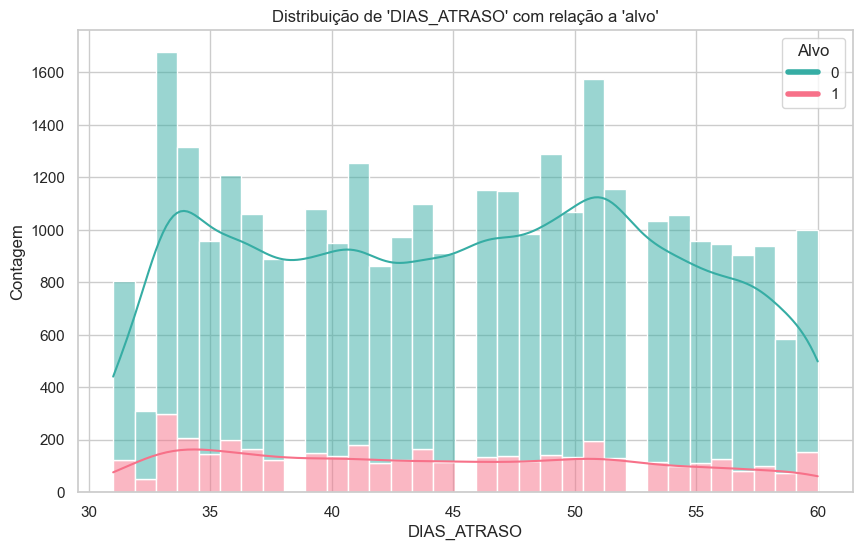

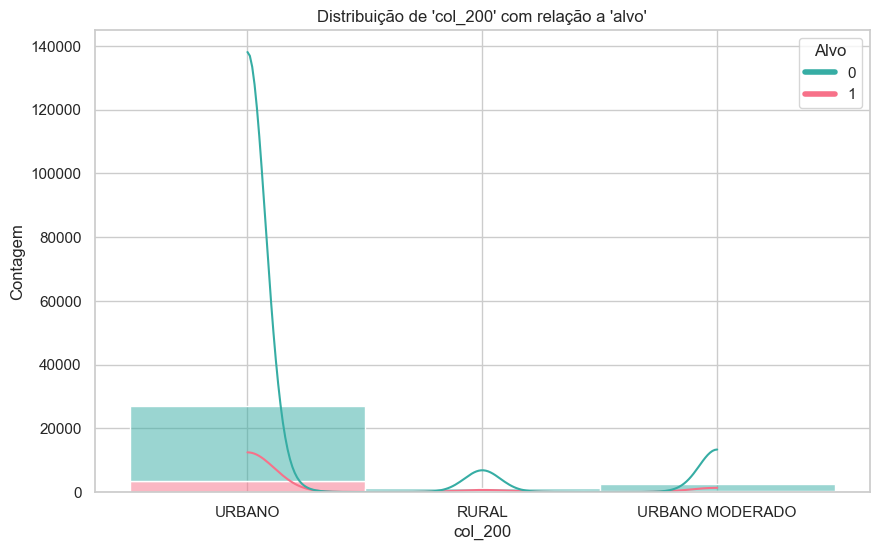

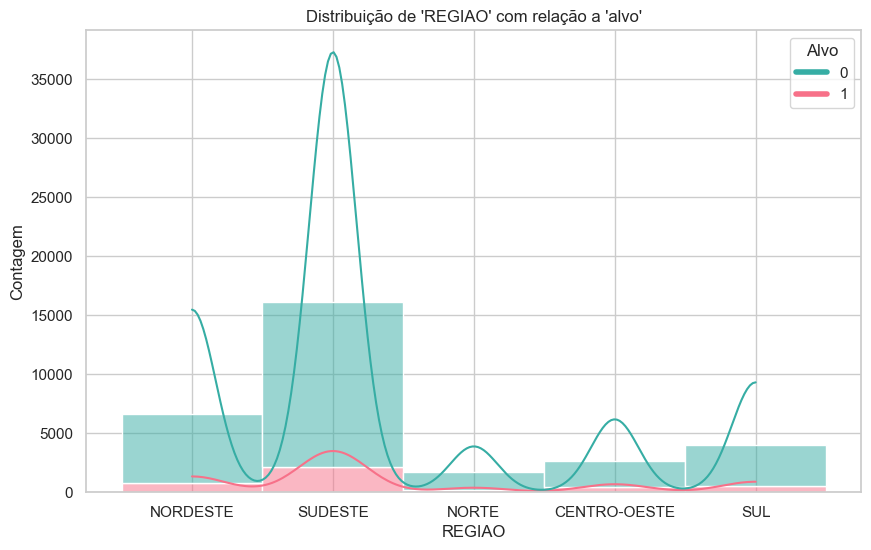

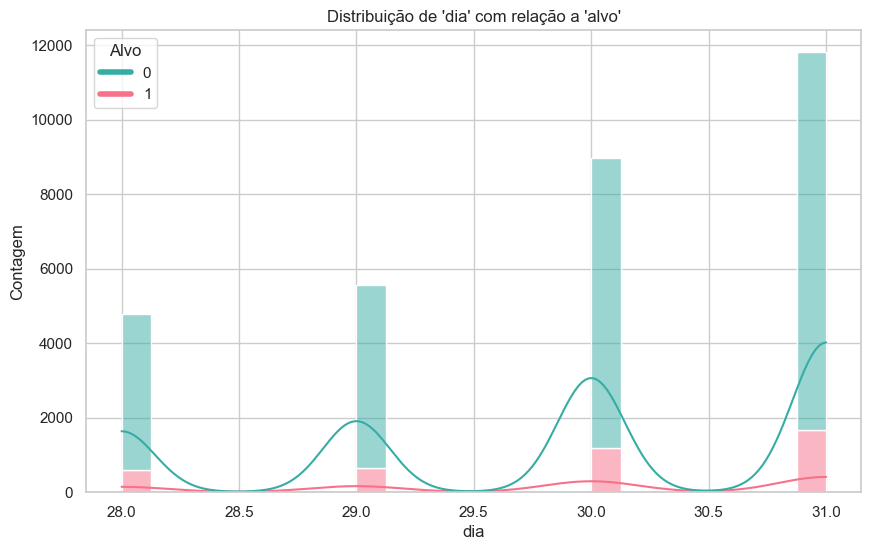

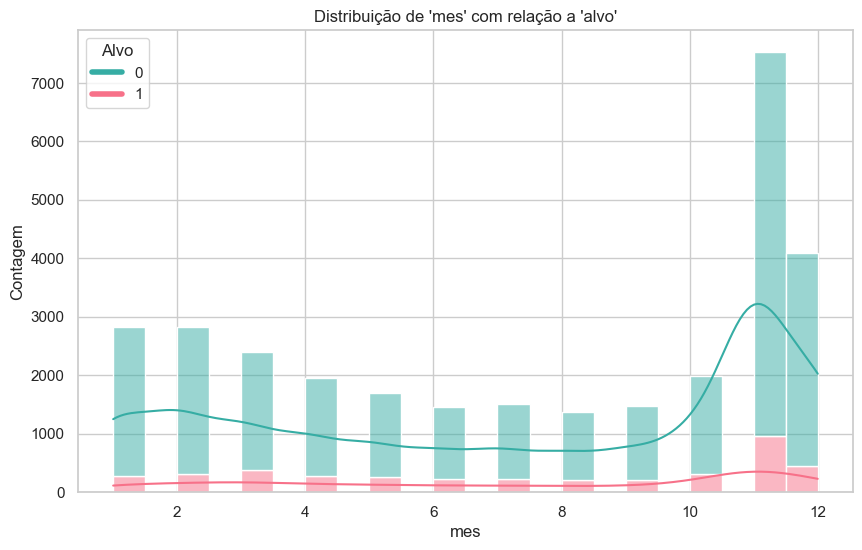

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
analise = pd.read_excel("Dados.xlsx")

# Remover dados ausentes
analise_limpo = analise.dropna()

# Definir as colunas para análise
colunas_para_analisar = ["DIAS_ATRASO", "col_200", "REGIAO", "dia", "mes"]

# Configurar o estilo dos gráficos
#sns.set(style="whitegrid")

# Obter valores únicos da coluna 'alvo'
valores_unicos_alvo = analise_limpo['alvo'].unique()
# Criar uma paleta de cores com base no número de valores únicos em 'alvo'
paleta_cores = sns.color_palette("husl", len(valores_unicos_alvo))[::-1]
# Criar um dicionário para mapear valores de 'alvo' para cores
mapa_cores = dict(zip(valores_unicos_alvo, paleta_cores))

# Criar gráficos de distribuição
for coluna in colunas_para_analisar:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=analise_limpo, x=coluna, hue='alvo', palette=mapa_cores, multiple="stack", kde=True)
    plt.title(f"Distribuição de '{coluna}' com relação a 'alvo'")
    plt.xlabel(coluna)
    plt.ylabel("Contagem")
    
    # Criar a legenda manualmente
    handles = [plt.Line2D([0], [0], color=mapa_cores[val], lw=4) for val in valores_unicos_alvo]
    labels = [str(val) for val in valores_unicos_alvo]

    ax.legend(handles=handles, labels=labels, title='Alvo')
    
    plt.show()

<Figure size 1000x600 with 0 Axes>

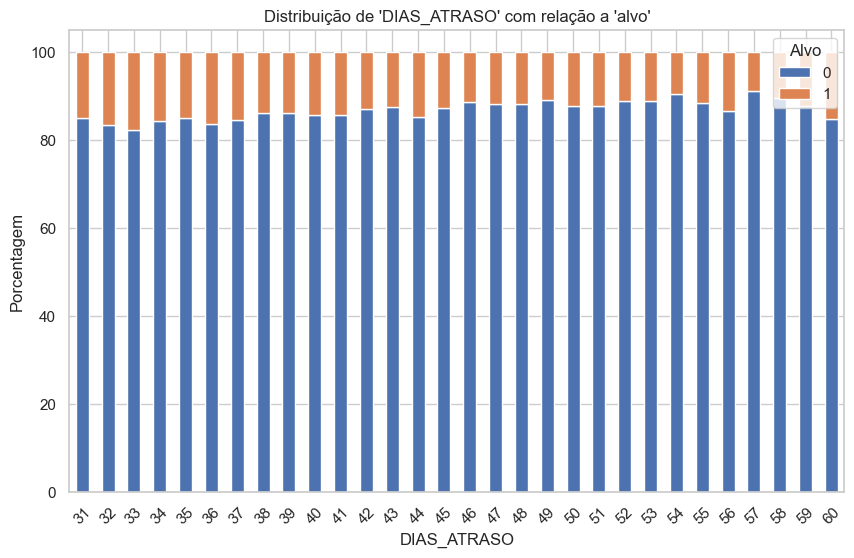

<Figure size 1000x600 with 0 Axes>

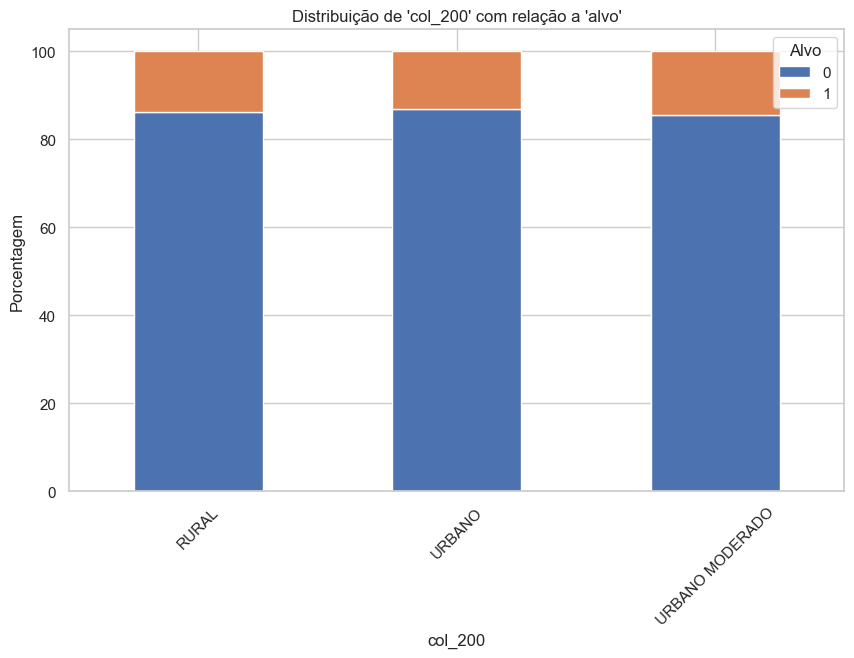

<Figure size 1000x600 with 0 Axes>

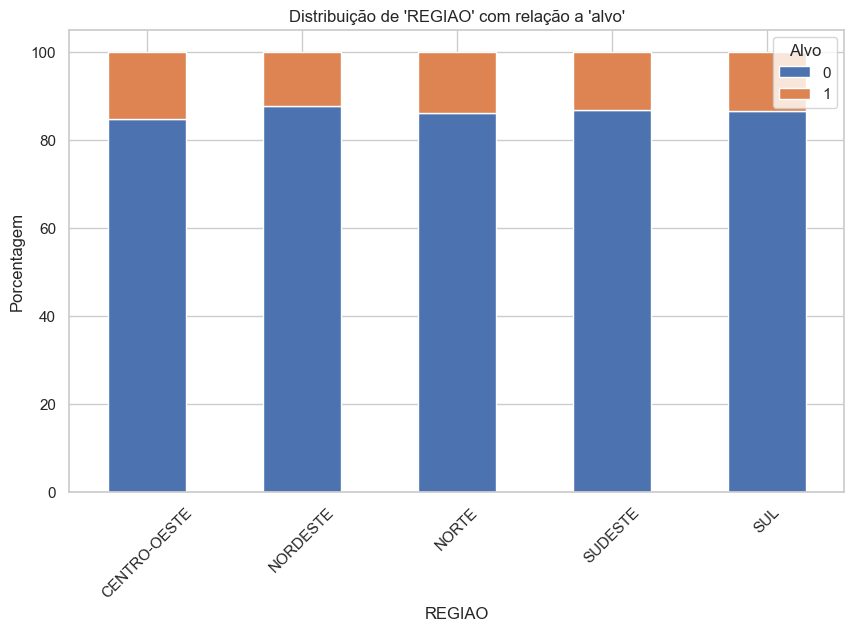

<Figure size 1000x600 with 0 Axes>

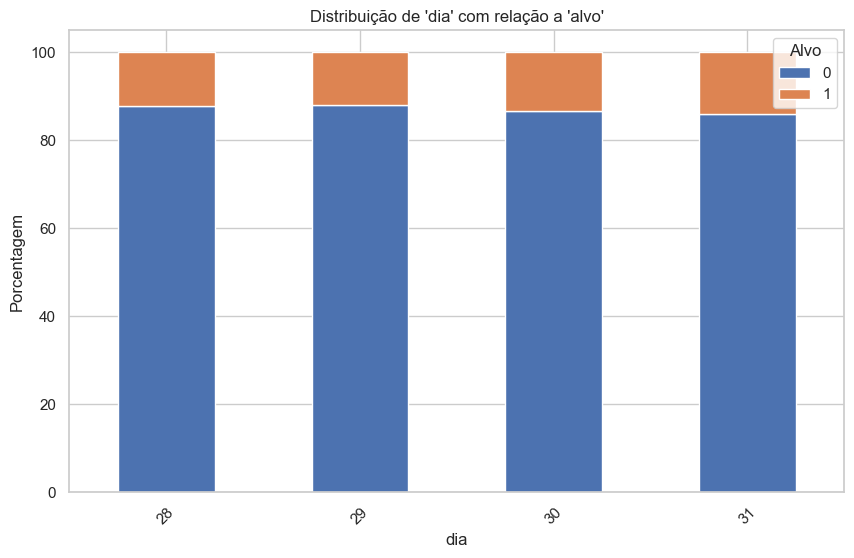

<Figure size 1000x600 with 0 Axes>

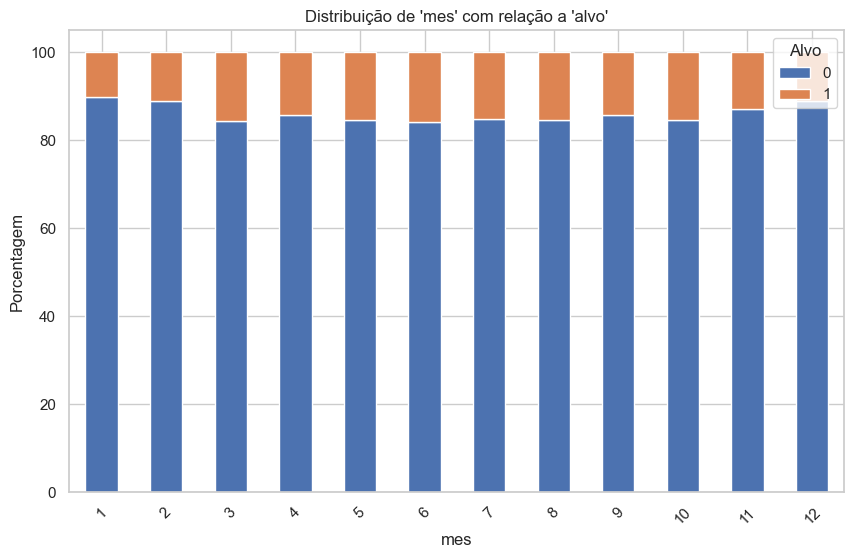

In [69]:
# Criar gráficos de distribuição
for coluna in colunas_para_analisar:
    plt.figure(figsize=(10, 6))
    
    # Calculando as proporções de alvo para cada categoria na coluna atual
    cross_tab = pd.crosstab(analise_limpo[coluna], analise_limpo['alvo'], normalize='index') * 100
    
    # Plotando o gráfico de colunas empilhadas
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f"Distribuição de '{coluna}' com relação a 'alvo'")
    plt.xlabel(coluna)
    plt.ylabel("Porcentagem")
    plt.legend(title='Alvo', loc='upper right')
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
    
    plt.show()


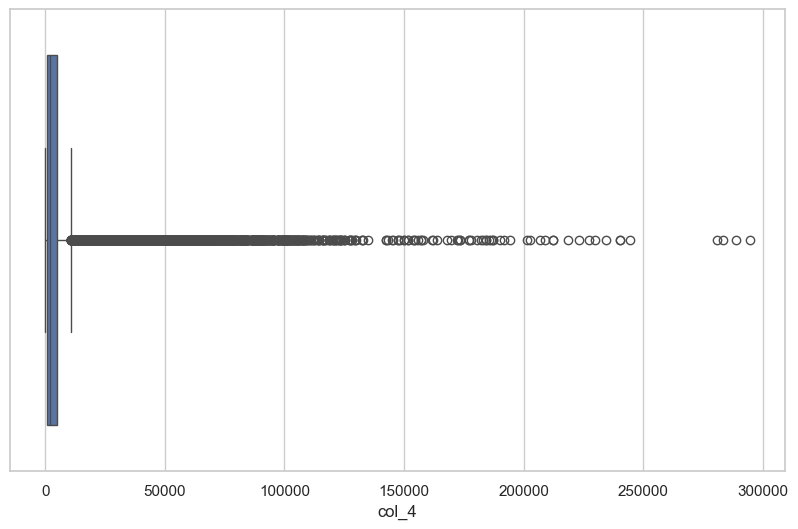

In [70]:
plt.figure(figsize=(10, 6))
    
# Plotando o boxplot de "col_4" com relação à coluna atual
sns.boxplot(data=analise_limpo["col_4"], orient="h")
plt.show()

Número de outliers removidos: 3038


C:\Users\Matheus\AppData\Local\Temp\ipykernel_13664\2944874102.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analise_sem_outliers, y='col_4', palette='pastel')


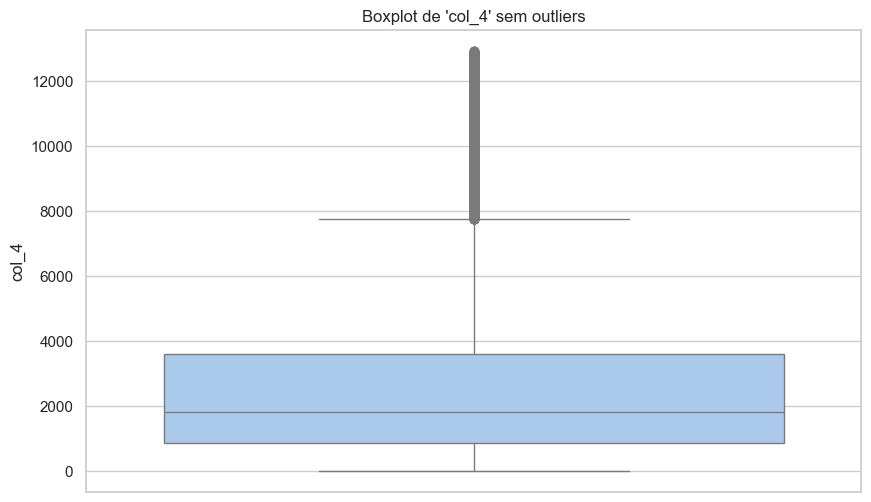

In [75]:
# Calculando o IQR
Q1 = analise_limpo['col_4'].quantile(0.25)
Q3 = analise_limpo['col_4'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
limite_inferior = Q1 - 2 * IQR
limite_superior = Q3 + 2 * IQR

# Removendo outliers
analise_sem_outliers = analise_limpo[(analise_limpo['col_4'] >= limite_inferior) & (analise_limpo['col_4'] <= limite_superior)]

# Verificando o número de linhas removidas
linhas_removidas = len(analise_limpo) - len(analise_sem_outliers)
print(f"Número de outliers removidos: {linhas_removidas}")

# Plotando o boxplot da coluna "col_4" sem outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=analise_sem_outliers, y='col_4', palette='pastel')
plt.title("Boxplot de 'col_4' sem outliers")
plt.ylabel("col_4")
plt.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13664\2381849107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analise_sem_outliers, x=coluna, y="col_4", palette="pastel")


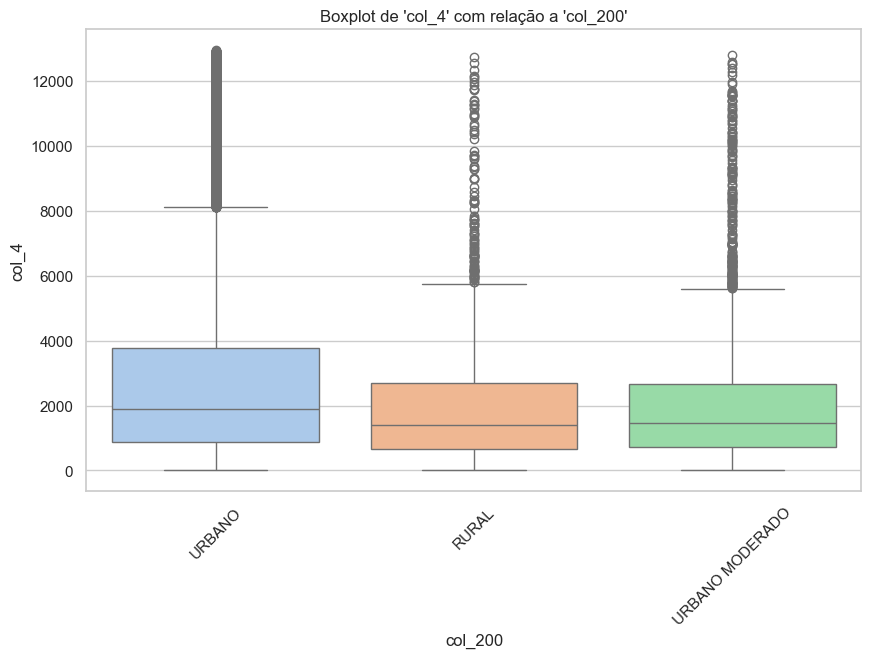

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13664\2381849107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analise_sem_outliers, x=coluna, y="col_4", palette="pastel")


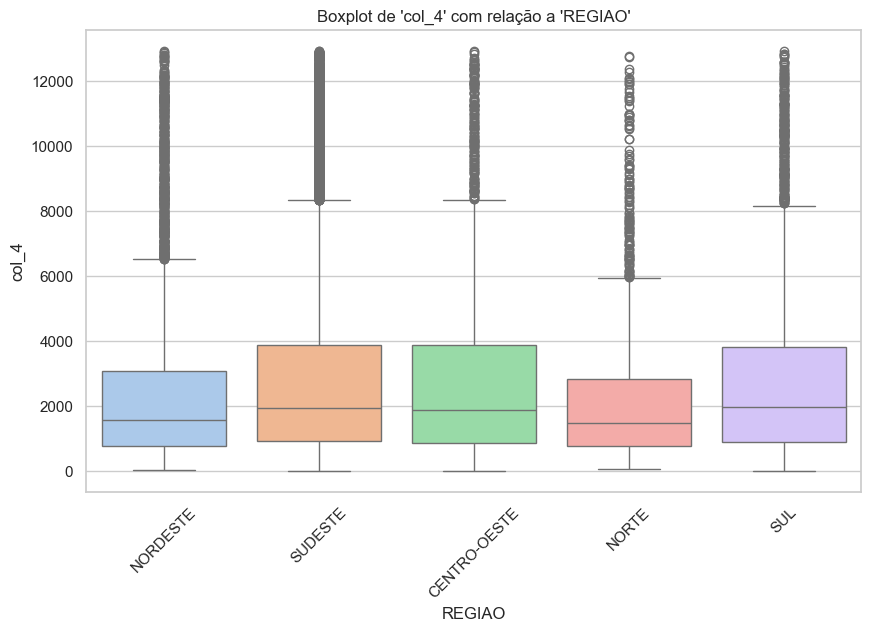

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13664\2381849107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analise_sem_outliers, x=coluna, y="col_4", palette="pastel")


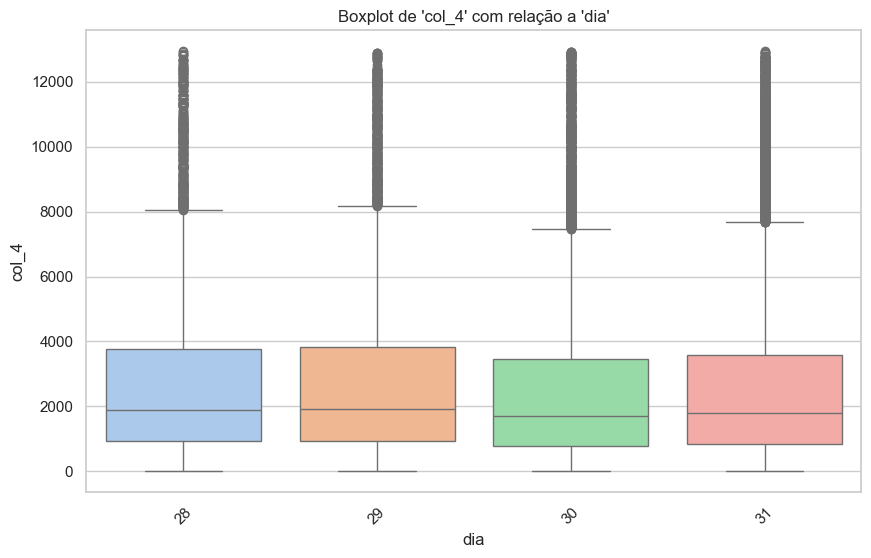

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13664\2381849107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analise_sem_outliers, x=coluna, y="col_4", palette="pastel")


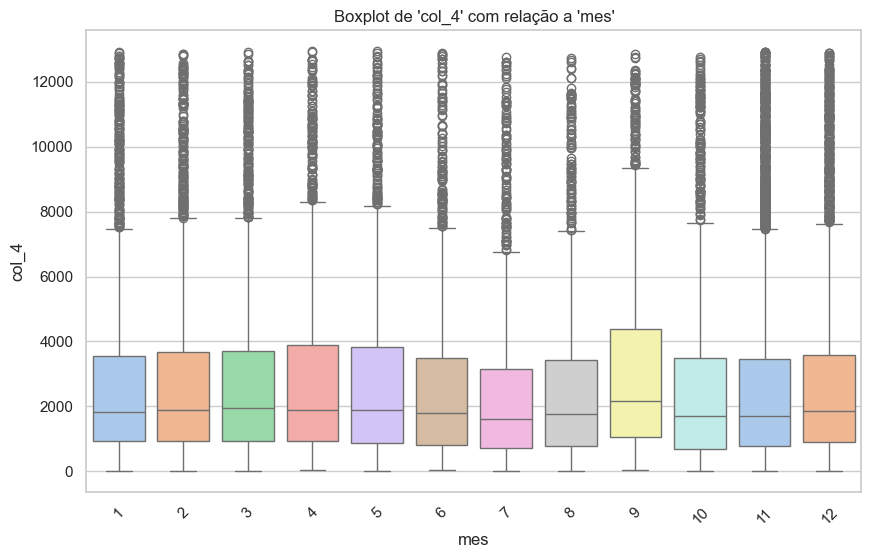

In [76]:
#colunas_para_analisar.remove("DIAS_ATRASO")

# Criar gráficos de distribuição
for coluna in colunas_para_analisar:
    plt.figure(figsize=(10, 6))
    
    # Plotando o boxplot de "col_4" com relação à coluna atual
    sns.boxplot(data=analise_sem_outliers, x=coluna, y="col_4", palette="pastel")
    
    plt.title(f"Boxplot de 'col_4' com relação a '{coluna}'")
    plt.xlabel(coluna)
    plt.ylabel("col_4")
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
    
    plt.show()